In [118]:
#### importing libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.style import use

In [3]:
### loading data
df=pd.read_csv("glassdoor_eda.csv")

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,range-salary,min_salary,max_salary,avg_salary,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,seniority,desc_len
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,53-91,53,91,72.0,NM,0,50,1,0,0,0,1,501-1000,data scientist,na,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,63-112,63,112,87.5,MD,0,39,1,0,0,0,0,10000+,data scientist,na,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,80-90,80,90,85.0,FL,1,13,1,0,1,0,1,501-1000,data scientist,na,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"['Oak Ridge National Laboratory', ' National R...",0,0,56-97,56,97,76.5,WA,1,58,1,0,0,0,0,1001-5000,data scientist,na,3883
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"['Commerce Signals', ' Cardlytics', ' Yodlee']",0,0,86-143,86,143,114.5,NY,1,25,1,0,0,0,1,51-200,data scientist,na,2728


In [40]:
def title_simplifier(title):
    if 'data scientist' in title.lower() or 'data science' in title.lower():
        return 'data scientist'
    elif 'scientist' in title.lower():
        return 'scientist'
    if 'data engineer' in title.lower() or 'engineering':
        return 'data engineer'
    if 'analyst' in title.lower():
        return 'analyst'
    if 'machine learning' in title.lower():
        return 'mle'
    if 'manager' in title.lower():
        return 'manager'
    if 'director' in title.lower():
        return 'director'
    if 'analyst' in title.lower():
        return 'analyst'
    if 'analyst' in title.lower() or 'analytics' in title.lower():
        return 'analyst'
    if 'software engineer' in title.lower() :
        return 'software engineer'

    else:
        return 'na'

In [41]:
df["job_simp"]=df["Job Title"].apply(title_simplifier)

In [43]:
df_na_job_simp["Job Title"].unique()

array([], dtype=object)

In [ ]:
df_new=df[["Rating","Type of ownership","Industry","Sector","Revenue","hourly","employer_provided","job_state","same_state","age","python_skill","rstudio_skill","spark_skill","aws_skill","excel_skill","size_number","job_simp","seniority","desc_len","avg_salary"]]

In [51]:
df_new.head()

,Rating,Type of ownership,Industry,Sector,Revenue,hourly,employer_provided,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,seniority,desc_len,avg_salary
0,3.8,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,NM,0,50,1,0,0,0,1,501-1000,data scientist,na,2536,72.0
1,3.4,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,MD,0,39,1,0,0,0,0,10000+,data scientist,na,4783,87.5
2,4.8,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,FL,1,13,1,0,1,0,1,501-1000,data scientist,na,3461,85.0
3,3.8,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0,WA,1,58,1,0,0,0,0,1001-5000,data scientist,na,3883,76.5
4,2.9,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,0,NY,1,25,1,0,0,0,1,51-200,data scientist,na,2728,114.5


### fixing missing values

In [53]:
df_new.isna().sum()

Rating               0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
hourly               0
employer_provided    0
job_state            0
same_state           0
age                  0
python_skill         0
rstudio_skill        0
spark_skill          0
aws_skill            0
excel_skill          0
size_number          0
job_simp             0
seniority            0
desc_len             0
avg_salary           0
dtype: int64

**remark**: in our case -1 and 'na' in the  dataset is a null value 

In [60]:
### columns with that contains -1 or '-1'
columns_with_negative_one_string = df_new.columns[(df_new == '-1').any()].tolist()
negative_one_count_string_txt = {col: df_new[col].eq('-1').sum() for col in columns_with_negative_one_string}
columns_with_negative_one_string = df_new.columns[(df_new == -1).any()].tolist()
negative_one_count_string = {col: df_new[col].eq(-1).sum() for col in columns_with_negative_one_string}
columns_with_neg_1_values={**negative_one_count_string_txt,**negative_one_count_string}

In [61]:
columns_with_neg_1_values

{'Type of ownership': 1,
 'Industry': 10,
 'Sector': 10,
 'Revenue': 1,
 'size_number': 1,
 'Rating': 11,
 'age': 50}

In [ ]:
### columns with 'na'
columns_with_na = df_new.columns[(df_new == 'na').any()].tolist()
na_one_count_ = {col: df_new[col].eq('na').sum() for col in columns_with_na}

In [54]:
na_one_count_

{'seniority': 519}

In [55]:
df[df['seniority']=='na'][['Job Title','seniority']]

,Job Title,seniority
0,Data Scientist,na
1,Healthcare Data Scientist,na
2,Data Scientist,na
3,Data Scientist,na
4,Data Scientist,na
...,...,...
734,Data Science Project Manager,na
735,Data Engineer,na
739,"Project Scientist - Auton Lab, Robotics Institute",na
740,Data Science Manager,na


In [58]:
df_new.drop("seniority",axis=1,inplace=True)

In [62]:
### featuring the columns with -1
columns_with_neg_1_values

{'Type of ownership': 1,
 'Industry': 10,
 'Sector': 10,
 'Revenue': 1,
 'size_number': 1,
 'Rating': 11,
 'age': 50}

In [65]:
print(df_new['Industry'].unique())

['Aerospace & Defense' 'Health Care Services & Hospitals'
 'Security Services' 'Energy' 'Advertising & Marketing' 'Real Estate'
 'Banks & Credit Unions' 'Consulting' 'Internet' 'Other Retail Stores'
 'Research & Development' 'Department, Clothing, & Shoe Stores'
 'Biotech & Pharmaceuticals' 'Motion Picture Production & Distribution'
 'Enterprise Software & Network Solutions' 'Insurance Carriers'
 'Insurance Agencies & Brokerages' 'Logistics & Supply Chain'
 'Telecommunications Services' 'IT Services'
 'Computer Hardware & Software' '-1' 'Consumer Products Manufacturing'
 'Industrial Manufacturing' 'Metals Brokers'
 'Financial Transaction Processing' 'Sporting Goods Stores'
 'Staffing & Outsourcing' 'Wholesale' 'Mining'
 'Financial Analytics & Research' 'Federal Agencies'
 'Education Training Services' 'Transportation Equipment Manufacturing'
 'Farm Support Services' 'TV Broadcast & Cable Networks'
 'Architectural & Engineering Services' 'Brokerage Services'
 'Travel Agencies' 'Religiou

In [63]:
len(df_new['Industry'].unique())

60

In [66]:
df_new['Sector'].unique()

array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate', 'Finance',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Media', 'Insurance', 'Transportation & Logistics',
       'Telecommunications', '-1', 'Manufacturing', 'Mining & Metals',
       'Government', 'Education', 'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation',
       'Construction, Repair & Maintenance', 'Accounting & Legal',
       'Consumer Services'], dtype=object)

In [64]:
len(df_new['Sector'].unique())

25

In [67]:
#### removing Industry and sector columns 
df_new.drop("Industry",axis=1,inplace=True)

In [73]:
df_new.drop("Sector",axis=1,inplace=True)

In [68]:
#### removing columns that have only -1
df_new[df_new['Type of ownership']=='-1']

,Rating,Type of ownership,Sector,Revenue,hourly,employer_provided,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,desc_len,avg_salary
581,-1.0,-1,-1,-1,0,1,MA,0,-1,0,0,0,0,1,-1,scientist,3437,117.5


In [69]:
df_new.drop(581,axis=0,inplace=True)

In [70]:
df_new[df_new['Revenue']=='-1']

,Rating,Type of ownership,Sector,Revenue,hourly,employer_provided,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,desc_len,avg_salary


In [71]:
df_new[df_new['size_number']=='-1']

,Rating,Type of ownership,Sector,Revenue,hourly,employer_provided,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,desc_len,avg_salary


In [74]:
df_new.head()

,Rating,Type of ownership,Revenue,hourly,employer_provided,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,desc_len,avg_salary
0,3.8,Company - Private,$50 to $100 million (USD),0,0,NM,0,50,1,0,0,0,1,501-1000,data scientist,2536,72.0
1,3.4,Other Organization,$2 to $5 billion (USD),0,0,MD,0,39,1,0,0,0,0,10000+,data scientist,4783,87.5
2,4.8,Company - Private,$100 to $500 million (USD),0,0,FL,1,13,1,0,1,0,1,501-1000,data scientist,3461,85.0
3,3.8,Government,$500 million to $1 billion (USD),0,0,WA,1,58,1,0,0,0,0,1001-5000,data scientist,3883,76.5
4,2.9,Company - Private,Unknown / Non-Applicable,0,0,NY,1,25,1,0,0,0,1,51-200,data scientist,2728,114.5


**remark**: there is duplicated rows

In [77]:
#### dropping duplicated
df_new.drop_duplicates(inplace=True)
df.drop_duplicates(inplace=True)

In [78]:
#### dealing with  rating
df[df['Rating']==-1]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,range-salary,min_salary,max_salary,avg_salary,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,seniority,desc_len
176,Principal Data Scientist with over 10 years ex...,Employer Provided Salary:$200K-$250K,Position Title: Principal Data Scientist\nLoca...,-1.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 to 200 employees,2017,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),0,0,1,200-250,200,250,225.0,CA,0,6,1,0,0,1,1,51-200,data scientist,senior,1632
300,Data Operations Lead,Employer Provided Salary:$85K-$90K,Data Operations Lead\nLocation: Flexible thoug...,-1.0,Muso,"San Francisco, CA","San Francisco, CA",201 to 500 employees,-1,Nonprofit Organization,-1,-1,Unknown / Non-Applicable,0,0,1,85-90,85,90,87.5,CA,1,-1,1,0,0,0,1,201-500,data engineer,senior,5924
370,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,0,0,1,100-140,100,140,120.0,MA,0,-1,0,0,0,0,1,Unknown,scientist,na,3309
404,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,0,0,1,110-130,110,130,120.0,MA,0,-1,0,0,0,0,0,Unknown,scientist,senior,3214
456,Data Scientist,$81K-$140K (Glassdoor est.),"As a Data Scientist, you will play a critical ...",-1.0,ALIN,"New York, NY","Noida, India",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,0,0,0,81-140,81,140,110.5,NY,0,-1,1,0,0,0,0,Unknown,data scientist,na,1838
581,"Scientist – Cancer Discovery, Molecular Assay",Employer Provided Salary:$100K-$135K,"Scientist – Cancer Discovery, Molecular Assay\...",-1.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,-1,-1,-1,-1,-1,-1,0,0,1,100-135,100,135,117.5,MA,0,-1,0,0,0,0,1,-1,scientist,na,3437
641,"Principal Research Scientist/Team Lead, Medici...",Employer Provided Salary:$120K-$145K,"Principal Research Scientist/Team Lead, Medici...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,0,0,1,120-145,120,145,132.5,MA,0,-1,0,0,0,0,0,Unknown,scientist,senior,3082


In [80]:
#### searching for the rating for ['CA-One Tech Cloud','Muso','Kronos Bio','ALIN','Monte Rosa Therapeutics']

df[df["Company Name"].isin(['CA-One Tech Cloud','Muso','Kronos Bio','ALIN','Monte Rosa Therapeutics'])]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,range-salary,min_salary,max_salary,avg_salary,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,seniority,desc_len
176,Principal Data Scientist with over 10 years ex...,Employer Provided Salary:$200K-$250K,Position Title: Principal Data Scientist\nLoca...,-1.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 to 200 employees,2017,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),0,0,1,200-250,200,250,225.0,CA,0,6,1,0,0,1,1,51-200,data scientist,senior,1632
300,Data Operations Lead,Employer Provided Salary:$85K-$90K,Data Operations Lead\nLocation: Flexible thoug...,-1.0,Muso,"San Francisco, CA","San Francisco, CA",201 to 500 employees,-1,Nonprofit Organization,-1,-1,Unknown / Non-Applicable,0,0,1,85-90,85,90,87.5,CA,1,-1,1,0,0,0,1,201-500,data engineer,senior,5924
370,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,0,0,1,100-140,100,140,120.0,MA,0,-1,0,0,0,0,1,Unknown,scientist,na,3309
404,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,0,0,1,110-130,110,130,120.0,MA,0,-1,0,0,0,0,0,Unknown,scientist,senior,3214
456,Data Scientist,$81K-$140K (Glassdoor est.),"As a Data Scientist, you will play a critical ...",-1.0,ALIN,"New York, NY","Noida, India",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,0,0,0,81-140,81,140,110.5,NY,0,-1,1,0,0,0,0,Unknown,data scientist,na,1838
581,"Scientist – Cancer Discovery, Molecular Assay",Employer Provided Salary:$100K-$135K,"Scientist – Cancer Discovery, Molecular Assay\...",-1.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,-1,-1,-1,-1,-1,-1,0,0,1,100-135,100,135,117.5,MA,0,-1,0,0,0,0,1,-1,scientist,na,3437
641,"Principal Research Scientist/Team Lead, Medici...",Employer Provided Salary:$120K-$145K,"Principal Research Scientist/Team Lead, Medici...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,0,0,1,120-145,120,145,132.5,MA,0,-1,0,0,0,0,0,Unknown,scientist,senior,3082


 in google i find for:
1.  CA-One Tech Cloud Inc=3.3
2. Muso=4.4
3. Kronos Bio= 3.0
4. ALIN=3.5
5. Monte Rosa Therapeutics=2.75



In [86]:
df.loc[df["Company Name"]=="CA-One Tech Cloud","Rating"]=3.3


In [87]:
df.loc[df["Company Name"]=="CA-One Tech Cloud","Rating"]

176    3.3
Name: Rating, dtype: float64

In [108]:
df_new.loc[176,"Rating"]=3.3

In [92]:
df.loc[df["Company Name"]=="Muso","Rating"]=4.4

df.loc[df["Company Name"]=="Muso","Rating"]

300    4.4
Name: Rating, dtype: float64

In [96]:
df_new.loc[300,"Rating"]=4.4

In [95]:
df.loc[df["Company Name"]=="Kronos Bio","Rating"]=3.0

df.loc[df["Company Name"]=="Kronos Bio","Rating"]

370    3.0
404    3.0
641    3.0
Name: Rating, dtype: float64

In [97]:
df_new.loc[[370,404,641],"Rating"]=3.0

In [98]:
df_new.loc[[370,404,641],"Rating"]

370    3.0
404    3.0
641    3.0
Name: Rating, dtype: float64

In [99]:
df.loc[df["Company Name"]=="ALIN","Rating"]=3.5

df.loc[df["Company Name"]=="ALIN","Rating"]

456    3.5
Name: Rating, dtype: float64

In [100]:
df_new.loc[456,"Rating"]=3.5

In [101]:
df.loc[df["Company Name"]=="Monte Rosa Therapeutics","Rating"]=2.75

df.loc[df["Company Name"]=="Monte Rosa Therapeutics","Rating"]

581    2.75
Name: Rating, dtype: float64

In [102]:
df_new.loc[581,"Rating"]=2.75

In [109]:
df_new[df_new["Rating"]==-1]

,Rating,Type of ownership,Revenue,hourly,employer_provided,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,desc_len,avg_salary


In [114]:
#### dealing with age:
df[df['age']==-1].head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,range-salary,min_salary,max_salary,avg_salary,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,seniority,desc_len
41,Data Engineer,$68K-$129K (Glassdoor est.),Position Title: Data Engineer\n\nPersivia is s...,3.6,Persivia,"Marlborough, MA","Lowell, MA",1 to 50 employees,-1,Company - Private,-1,-1,Less than $1 million (USD),0,0,0,68-129,68,129,98.5,MA,0,-1,0,0,0,0,1,1-50,data engineer,na,1996
45,Data Scientist,Employer Provided Salary:$150K-$160K,"BPA Services, LLC is seeking a Computer/Data S...",5.0,BPA Services,"Washington, DC","Alexandria, VA",Unknown,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,0,0,1,150-160,150,160,155.0,DC,0,-1,0,0,0,1,1,Unknown,data scientist,na,3213
68,Data Scientist,$96K-$161K (Glassdoor est.),SummaryProvide data management and statistical...,3.2,"Numeric, LLC","Philadelphia, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,0,0,96-161,96,161,128.5,PA,0,-1,1,0,1,1,0,1-50,data scientist,na,2306
141,Data Engineer 4 - Contract,$59K-$115K (Glassdoor est.),Purposes\n\nAs a member of the Business Intell...,4.2,The Church of Jesus Christ of Latter-day Saints,"Riverton, UT","Salt Lake City, UT",10000+ employees,-1,Nonprofit Organization,Religious Organizations,Non-Profit,Unknown / Non-Applicable,0,0,0,59-115,59,115,87.0,UT,0,-1,0,0,0,1,1,10000+,data engineer,na,3066
162,Data Engineer 5 - Contract (Remote),$74K-$140K (Glassdoor est.),Purposes\n\nThis is a remote contract position...,4.2,The Church of Jesus Christ of Latter-day Saints,"Riverton, UT","Salt Lake City, UT",10000+ employees,-1,Nonprofit Organization,Religious Organizations,Non-Profit,Unknown / Non-Applicable,0,0,0,74-140,74,140,107.0,UT,0,-1,0,0,0,0,1,10000+,data engineer,na,2617


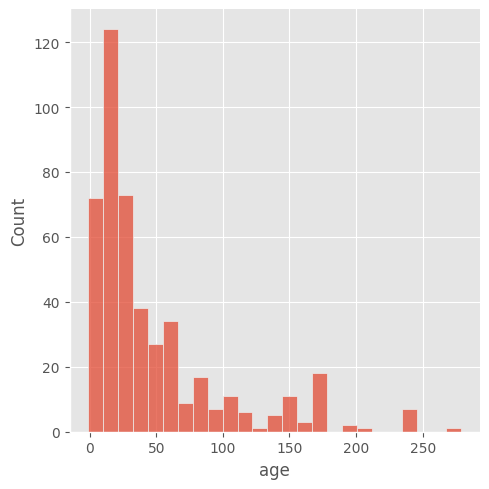

In [123]:
use("ggplot")
sns.displot(df["age"])
plt.show()

In [124]:
df[["age"]].describe()

,age
count,467.000000
mean,47.464668
std,52.619742
min,-1.000000
25%,13.000000
50%,27.000000
75%,58.000000
max,279.000000


In [131]:
df.loc[df["age"]!=-1,"age"].sort_values()

229      4
110      4
127      6
320      6
138      6
      ... 
174    242
178    242
14     242
289    242
277    279
Name: age, Length: 434, dtype: int64

In [132]:
#### Median imputation
df.loc[df["age"]==-1,"age"]=df.loc[df["age"]!=-1,"age"].median()

In [133]:
df_new.loc[df_new["age"]==-1,"age"]=df_new.loc[df_new["age"]!=-1,"age"].median()

In [134]:
df[df['age']==-1]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,range-salary,min_salary,max_salary,avg_salary,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,seniority,desc_len


In [ ]:
##### we finished with missing values

In [135]:
df_new.head()

,Rating,Type of ownership,Revenue,hourly,employer_provided,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,desc_len,avg_salary
0,3.8,Company - Private,$50 to $100 million (USD),0.0,0.0,NM,0.0,50.0,1.0,0.0,0.0,0.0,1.0,501-1000,data scientist,2536.0,72.0
1,3.4,Other Organization,$2 to $5 billion (USD),0.0,0.0,MD,0.0,39.0,1.0,0.0,0.0,0.0,0.0,10000+,data scientist,4783.0,87.5
2,4.8,Company - Private,$100 to $500 million (USD),0.0,0.0,FL,1.0,13.0,1.0,0.0,1.0,0.0,1.0,501-1000,data scientist,3461.0,85.0
3,3.8,Government,$500 million to $1 billion (USD),0.0,0.0,WA,1.0,58.0,1.0,0.0,0.0,0.0,0.0,1001-5000,data scientist,3883.0,76.5
4,2.9,Company - Private,Unknown / Non-Applicable,0.0,0.0,NY,1.0,25.0,1.0,0.0,0.0,0.0,1.0,51-200,data scientist,2728.0,114.5


### converting categorical features

In [136]:
df_dummies=pd.get_dummies(df_new,drop_first=True)

In [138]:
df_dummies.shape

(467, 79)

In [139]:
df_dummies.head()

,Rating,hourly,employer_provided,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,desc_len,avg_salary,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,job_state_ AZ,job_state_ CA,job_state_ CO,job_state_ CT,job_state_ DC,job_state_ DE,job_state_ FL,job_state_ GA,job_state_ IA,job_state_ ID,job_state_ IL,job_state_ IN,job_state_ KS,job_state_ KY,job_state_ LA,job_state_ Los Angeles,job_state_ MA,job_state_ MD,job_state_ MI,job_state_ MN,job_state_ MO,job_state_ NC,job_state_ NE,job_state_ NJ,job_state_ NM,job_state_ NY,job_state_ OH,job_state_ OR,job_state_ PA,job_state_ RI,job_state_ SC,job_state_ TN,job_state_ TX,job_state_ UT,job_state_ VA,job_state_ WA,job_state_ WI,size_number_10000+,size_number_1001-5000,size_number_201-500,size_number_5001-10000,size_number_501-1000,size_number_51-200,size_number_Unknown,job_simp_data scientist,job_simp_scientist
0,3.8,0.0,0.0,0.0,50.0,1.0,0.0,0.0,0.0,1.0,2536.0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,3.4,0.0,0.0,0.0,39.0,1.0,0.0,0.0,0.0,0.0,4783.0,87.5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,4.8,0.0,0.0,1.0,13.0,1.0,0.0,1.0,0.0,1.0,3461.0,85.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,3.8,0.0,0.0,1.0,58.0,1.0,0.0,0.0,0.0,0.0,3883.0,76.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,2.9,0.0,0.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,2728.0,114.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [141]:
df.to_csv("data_prepared_.csv",index=False)


In [142]:
df_new.to_csv("data_prepared_model.csv",index=False)